In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

pd.set_option('display.max_columns', None)

file_path = os.path.join(os.path.dirname(sys.path[0]), 'clean_data/gurgaon_properties_imputed.csv')
df = pd.read_csv(file_path)

df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedroom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,study room,store room,pooja room,others,furnishing_type,luxury_score
1249,flat,adani aangan galleria,sector 89,0.42,4941.0,2,2,2,3.0,Relatively New,769.047619,0,0,0,0,0,0,0
3326,flat,raheja revanta,sector 78,0.99,6100.0,2,2,3,14.0,Under Construction,1466.619048,0,0,0,0,1,0,48
1717,flat,trisara our homes 3,sohna road,0.34,5405.0,2,2,1,0.0,New Property,698.888889,0,0,0,0,0,0,0
2973,flat,adani brahma samsara vilasa,sector 63,3.35,16470.0,3,3,3+,3.0,New Property,2034.000000,0,0,0,0,0,2,25
1902,flat,smart world gems,sector 89,0.95,8597.0,2,2,2,4.0,New Property,1225.555556,1,1,0,0,0,0,47


In [64]:
train_df = df.drop(columns=['society', 'price_per_sqft'])
train_df.sample(5)

,property_type,sector,price,bedroom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,study room,store room,pooja room,others,furnishing_type,luxury_score
1673,flat,sector 70a,2.80,3,4,3,22.0,Relatively New,2350.00000,1,0,0,0,0,0,49
2845,flat,sector 106,0.88,2,2,3+,1.0,Relatively New,940.00000,0,0,0,0,0,0,49
808,flat,sector 77,2.25,3,3,3,22.0,New Property,1809.52381,1,0,0,0,0,2,51
2634,flat,sector 92,1.55,3,4,3,8.0,Relatively New,1805.00000,1,0,0,0,0,0,49
371,flat,sector 83,0.65,1,1,0,6.0,Relatively New,700.00000,0,0,0,0,0,0,0


<Axes: >

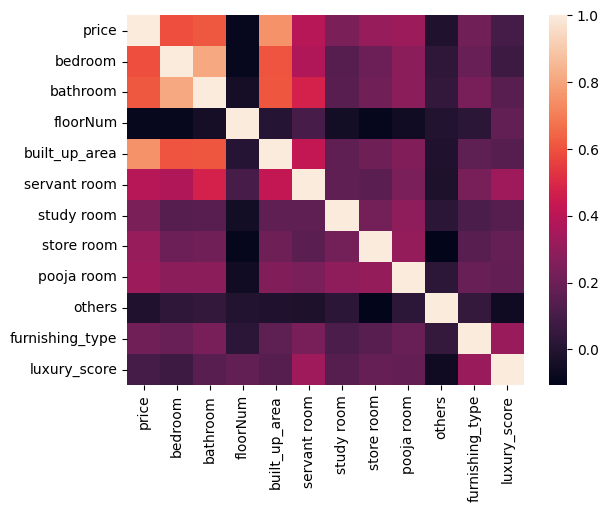

In [65]:
sns.heatmap(train_df.corr(numeric_only=True))

In [66]:
train_df.corr(numeric_only=True)['price'].sort_values(ascending=False)

price              1.000000
built_up_area      0.751375
bathroom           0.611612
bedroom            0.592119
servant room       0.391814
pooja room         0.322017
store room         0.309191
study room         0.241373
furnishing_type    0.217665
luxury_score       0.093882
others            -0.013408
floorNum          -0.087477
Name: price, dtype: float64

In [67]:
# col in question
# numerical -> luxury_score, others, floorNum
# categorical -> property_type, sector, agePossession

# luxury_score

<Axes: xlabel='luxury_score'>

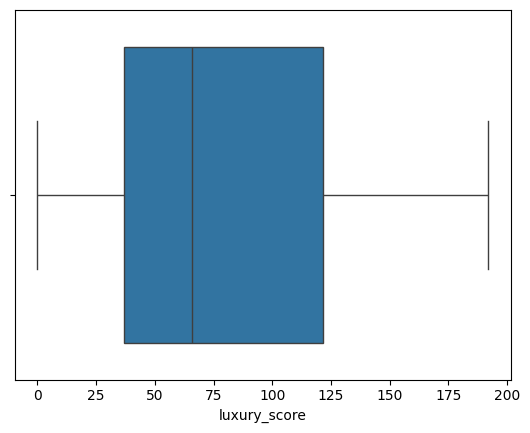

In [68]:
sns.boxplot(x = train_df['luxury_score'])

In [69]:
def cat_luxury_score(score):
    if score < 50:
        return 'Low'
    elif score < 150:
        return 'Medium'
    elif score >= 150:
        return 'High'
    else:
        return np.nan
    
train_df['luxury_score'] = train_df['luxury_score'].apply(cat_luxury_score)


In [70]:
train_df['luxury_score'].sample(5)

1717       Low
3011       Low
2294    Medium
13         Low
3176       Low
Name: luxury_score, dtype: object

# floorNum

<Axes: xlabel='floorNum'>

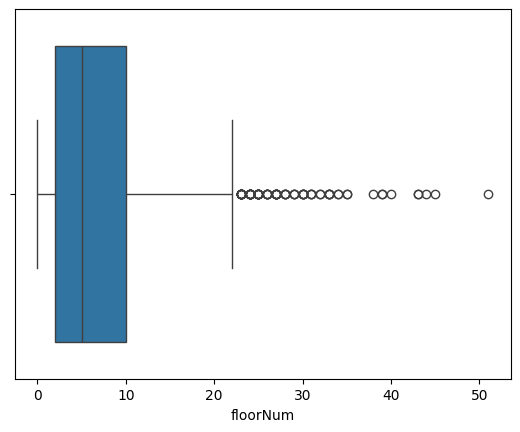

In [71]:
sns.boxplot(x = train_df['floorNum'])

In [72]:
def cat_floorNum(floor):
    if 0 <= floor <= 2:
        return 'Low Floor'
    elif floor <= 10:
        return 'Medium Floor'
    elif floor <= 51:
        return 'High Floor'
    else:
        return np.nan
    
train_df['floorNum'] = train_df['floorNum'].apply(cat_floorNum)

In [73]:
train_df['floorNum'].sample(5)

2580       Low Floor
2385    Medium Floor
1694       Low Floor
1056    Medium Floor
2987       Low Floor
Name: floorNum, dtype: object

In [74]:
train_df.sample(5)

,property_type,sector,price,bedroom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,study room,store room,pooja room,others,furnishing_type,luxury_score
367,house,sector 50,12.00,5,6,3+,Medium Floor,Moderately Old,3240.000000,0,0,0,0,0,0,Medium
3026,flat,sector 2,1.40,3,3,3+,Medium Floor,Moderately Old,1610.476190,0,0,0,0,0,0,Medium
2245,flat,sector 102,1.99,2,2,2,High Floor,New Property,1145.261905,0,0,0,0,0,0,High
336,house,sector 7,3.00,7,7,0,Medium Floor,Old Property,2610.000000,0,0,0,0,0,0,Low
2519,flat,sector 63,0.88,1,1,2,Medium Floor,New Property,804.000000,0,0,0,0,0,0,Low


In [75]:
from sklearn.preprocessing import OrdinalEncoder

data = train_df.copy()

cat_col = data.select_dtypes(include=['object']).columns

for col in cat_col:
    oe = OrdinalEncoder(dtype=np.int64)
    data[col] = oe.fit_transform(data[[col]])
    print(oe.categories_)

#splitting x and y
x = data.drop(columns=['price'])
y = data['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 5

In [76]:
x.sample(5)

,property_type,sector,bedroom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,study room,store room,pooja room,others,furnishing_type,luxury_score
2077,0,44,3,3,2,2,3,1162.619048,0,0,0,0,0,0,1
1947,0,96,3,3,2,2,3,1583.333333,0,0,0,0,0,0,2
1316,0,97,2,2,2,0,3,1511.857143,0,0,0,0,0,0,1
1218,0,111,3,2,2,1,1,1244.444444,0,0,0,0,0,0,1
2155,0,75,4,5,4,0,0,2384.047619,1,0,0,0,0,2,0


In [77]:
y.sample(5)

2359    0.86
1536    2.62
2436    1.20
558     0.32
3190    1.95
Name: price, dtype: float64

### Feature Selection

## Technique 1 - Correlation Analysis

<Axes: >

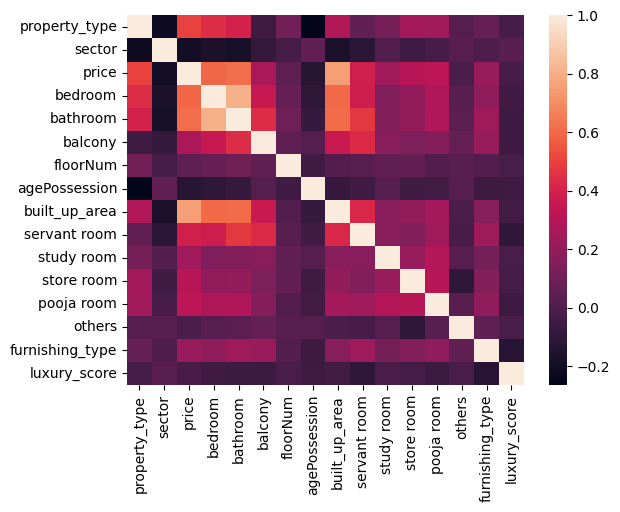

In [78]:
sns.heatmap(data.corr(numeric_only=True))

In [79]:
fi_df1 = data.corr(numeric_only=True)['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature', 'price':'corr_coef'})
fi_df1

,feature,corr_coef
0,sector,-0.202132
1,price,1.000000
2,bedroom,0.592119
3,bathroom,0.611612
4,balcony,0.271008
5,floorNum,0.044148
6,agePossession,-0.130624
7,built_up_area,0.751375
8,servant room,0.391814
9,study room,0.241373


## Technique 2 - Random Forest Feature Importance

In [80]:
from sklearn.ensemble import RandomForestRegressor

rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(x, y)

fi_df2 = pd.DataFrame({'feature': x.columns, 'rf_importance': rf_label.feature_importances_}).\
    sort_values(by= 'rf_importance', ascending=False)

fi_df2

,feature,rf_importance
7,built_up_area,0.646181
1,sector,0.107977
0,property_type,0.104254
3,bathroom,0.025039
2,bedroom,0.023968
8,servant room,0.018916
6,agePossession,0.013999
4,balcony,0.013276
11,pooja room,0.008890
14,luxury_score,0.007562


## Technique 3 - Gradient Boosting Feature Importance

In [81]:
from sklearn.ensemble import GradientBoostingRegressor

gb_label = GradientBoostingRegressor()
gb_label.fit(x, y)

fi_df3 = pd.DataFrame({'feature': x.columns, 'gb_importance': gb_label.feature_importances_}).\
    sort_values(by= 'gb_importance', ascending=False)

fi_df3

,feature,gb_importance
7,built_up_area,0.679251
1,sector,0.102174
0,property_type,0.098220
2,bedroom,0.037496
3,bathroom,0.034724
8,servant room,0.027233
10,store room,0.008617
6,agePossession,0.005382
13,furnishing_type,0.001634
9,study room,0.001394


## Technique 4 - Permutation Importance

In [82]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf_label = RandomForestRegressor(n_estimators=30, random_state=42)
rf_label.fit(x_train, y_train)

perm_imp = permutation_importance(rf_label, x_test, y_test, n_repeats=30, random_state=42)

fi_df4= pd.DataFrame({'feature': x.columns, 'permutation_importance': perm_imp.importances_mean}).\
    sort_values(by= 'permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
7,built_up_area,0.796605
0,property_type,0.175815
1,sector,0.127766
8,servant room,0.019167
6,agePossession,0.010097
4,balcony,0.007196
3,bathroom,0.005672
5,floorNum,0.001765
12,others,0.001319
11,pooja room,-0.000187


## Technique 5 - LASSO

In [83]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(x_scaled, y)

fi_df5 = pd.DataFrame({'feature': x.columns, 'lasso_coeff': lasso.coef_}).\
    sort_values(by= 'lasso_coeff',ascending=False)

fi_df5

,feature,lasso_coeff
7,built_up_area,1.525277
0,property_type,0.710052
3,bathroom,0.278241
10,store room,0.201298
9,study room,0.176617
8,servant room,0.167359
13,furnishing_type,0.144035
11,pooja room,0.077233
14,luxury_score,0.070076
2,bedroom,0.019794


## Technique 6 - RFE

In [84]:
from sklearn.feature_selection import RFE

estimator = RandomForestRegressor()
selected_label = RFE(estimator, n_features_to_select=x.shape[1], step=1)
selected_label = selected_label.fit(x, y)

selected_features = x.columns[selected_label.support_]
rfe_coeff = selected_label.estimator_.feature_importances_

fi_df6 = pd.DataFrame({'feature': selected_features, 'rfe_importance': rfe_coeff}).\
    sort_values(by= 'rfe_importance', ascending=False)

fi_df6

,feature,rfe_importance
7,built_up_area,0.652139
1,sector,0.105147
0,property_type,0.097987
2,bedroom,0.027154
3,bathroom,0.026975
8,servant room,0.018622
6,agePossession,0.014217
4,balcony,0.012469
10,store room,0.008861
14,luxury_score,0.007480


## Technique 7 - Linear Regression Weights

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(x)

lin_reg = LinearRegression()
lin_reg.fit(x_scaled, y)

fi_df7 = pd.DataFrame({'feature': x.columns, 'lr_importance': lin_reg.coef_}).\
    sort_values(by= 'lr_importance', ascending=False)

fi_df7

,feature,lr_importance
7,built_up_area,1.528017
0,property_type,0.710816
3,bathroom,0.284308
10,store room,0.205968
9,study room,0.184725
8,servant room,0.177044
13,furnishing_type,0.154280
14,luxury_score,0.082351
11,pooja room,0.080342
2,bedroom,0.022953


## Technique 8 - SHAP

In [86]:
import shap

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x, y)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x)

shap_sum = np.abs(shap_values).mean(axis = 0)

fi_df8 = pd.DataFrame({'feature': x.columns, 'shap_importance': shap_sum}).\
    sort_values(by= 'shap_importance', ascending=False)

fi_df8

,feature,shap_importance
7,built_up_area,1.250064
0,property_type,0.475709
1,sector,0.389260
3,bathroom,0.116165
8,servant room,0.094338
2,bedroom,0.052417
4,balcony,0.043502
6,agePossession,0.026528
5,floorNum,0.024917
13,furnishing_type,0.018241


In [87]:
expr = 'fi_df1'
for i in range(1, 8):
    expr += f".merge(fi_df{i+1}, on = 'feature')"
expr += ".set_index('feature')"
fi_df = eval(expr)
fi_df

,corr_coef,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_importance,lr_importance,shap_importance
feature,,,,,,,,
sector,-0.202132,0.107977,0.102174,0.127766,-0.054543,0.105147,-0.063503,0.389260
bedroom,0.592119,0.023968,0.037496,-0.008690,0.019794,0.027154,0.022953,0.052417
bathroom,0.611612,0.025039,0.034724,0.005672,0.278241,0.026975,0.284308,0.116165
balcony,0.271008,0.013276,0.001293,0.007196,-0.041932,0.012469,-0.064554,0.043502
floorNum,0.044148,0.006003,0.000608,0.001765,-0.000883,0.006708,-0.011297,0.024917
agePossession,-0.130624,0.013999,0.005382,0.010097,0.000000,0.014217,0.004776,0.026528
built_up_area,0.751375,0.646181,0.679251,0.796605,1.525277,0.652139,1.528017,1.250064
servant room,0.391814,0.018916,0.027233,0.019167,0.167359,0.018622,0.177044,0.094338
study room,0.241373,0.006551,0.001394,-0.005575,0.176617,0.006705,0.184725,0.014368


In [88]:
fi_df = fi_df.divide(fi_df.sum(axis=0), axis=1)
fi_df

,corr_coef,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_importance,lr_importance,shap_importance
feature,,,,,,,,
sector,-0.059774,0.120544,0.113302,0.135884,-0.021414,0.116569,-0.024789,0.186799
bedroom,0.175101,0.026757,0.041580,-0.009242,0.007771,0.030104,0.008960,0.025154
bathroom,0.180865,0.027953,0.038506,0.006033,0.109239,0.029905,0.110982,0.055746
balcony,0.080142,0.014821,0.001433,0.007654,-0.016463,0.013824,-0.025199,0.020876
floorNum,0.013055,0.006702,0.000674,0.001877,-0.000347,0.007436,-0.004410,0.011957
agePossession,-0.038628,0.015628,0.005968,0.010739,0.000000,0.015762,0.001864,0.012730
built_up_area,0.222196,0.721388,0.753234,0.847219,0.598830,0.722982,0.596472,0.599885
servant room,0.115867,0.021118,0.030199,0.020385,0.065706,0.020645,0.069110,0.045271
study room,0.071379,0.007314,0.001546,-0.005929,0.069341,0.007434,0.072109,0.006895


In [89]:
fi_df[['rf_importance', 'gb_importance', 'permutation_importance', 'rfe_importance', 'shap_importance']]\
    .mean(axis = 1).sort_values(ascending = False)

feature
built_up_area      0.728942
sector             0.134620
bathroom           0.031628
servant room       0.027524
bedroom            0.022871
agePossession      0.012165
balcony            0.011722
store room         0.006124
floorNum           0.005729
furnishing_type    0.005045
pooja room         0.004703
study room         0.003452
luxury_score       0.002835
others             0.002640
dtype: float64

In [90]:
#to drop pooja room, study room, others
#calculating r2 score on rf model with and without these columns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
score1 = cross_val_score(rf, x, y, cv=5, scoring = 'r2').mean()

rf = RandomForestRegressor(n_estimators=100, random_state=42)
score2 = cross_val_score(rf, x.drop(columns=['pooja room', 'study room', 'others']), y, cv=5, scoring = 'r2').mean()

score1, score2

(0.8101864947027184, 0.8084228339009464)

In [91]:
export_df = x.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y

file_path = os.path.join(os.path.dirname(sys.path[0]), 'clean_data/gurgaon_properties_feature_selected.csv')
export_df.to_csv(file_path, index=False)


In [92]:
export_df.dtypes

property_type        int64
sector               int64
bedroom              int64
bathroom             int64
balcony              int64
floorNum             int64
agePossession        int64
built_up_area      float64
servant room         int64
store room           int64
furnishing_type      int64
luxury_score         int64
price              float64
dtype: object

In [93]:
x.dtypes

property_type        int64
sector               int64
bedroom              int64
bathroom             int64
balcony              int64
floorNum             int64
agePossession        int64
built_up_area      float64
servant room         int64
study room           int64
store room           int64
pooja room           int64
others               int64
furnishing_type      int64
luxury_score         int64
dtype: object